In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, r2_score



In [40]:
df=pd.read_csv('dft_traffic_counts_raw_counts1.csv')

C:\Users\aryas\AppData\Local\Temp\ipykernel_21152\1359362947.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dft_traffic_counts_raw_counts1.csv')


In [41]:
df.shape

(4337136, 32)

In [42]:
df.head()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
0,52,E,2019,2019-09-06,17,1,South West,1,Isles of Scilly,A3112,...,0.0,8,0.0,0.0,0.0,0.0,0,0.0,0.0,25.0
1,52,E,2019,2019-09-06,12,1,South West,1,Isles of Scilly,A3112,...,0.0,8,0.0,0.0,0.0,0.0,0,0.0,0.0,37.0
2,52,E,2019,2019-09-06,14,1,South West,1,Isles of Scilly,A3112,...,0.0,9,0.0,0.0,0.0,0.0,0,0.0,0.0,27.0
3,52,W,2019,2019-09-06,14,1,South West,1,Isles of Scilly,A3112,...,1.0,11,0.0,0.0,0.0,0.0,0,0.0,0.0,33.0
4,52,W,2019,2019-09-06,12,1,South West,1,Isles of Scilly,A3112,...,1.0,9,0.0,0.0,0.0,0.0,0,0.0,0.0,29.0


In [66]:
df.tail()

,count_point_id,direction_of_travel,year,count_date,hour,region_id,region_name,local_authority_id,local_authority_name,road_name,...,buses_and_coaches,lgvs,hgvs_2_rigid_axle,hgvs_3_rigid_axle,hgvs_4_or_more_rigid_axle,hgvs_3_or_4_articulated_axle,hgvs_5_articulated_axle,hgvs_6_articulated_axle,all_hgvs,all_motor_vehicles
4337131,997144,S,2000,2000-10-06,14,11,North East,170,Middlesbrough,C,...,7.0,12,4.0,1.0,0.0,0.0,0,0.0,5.0,242.0
4337132,997144,S,2000,2000-10-06,15,11,North East,170,Middlesbrough,C,...,6.0,22,2.0,0.0,0.0,0.0,0,0.0,2.0,288.0
4337133,997144,S,2000,2000-10-06,16,11,North East,170,Middlesbrough,C,...,8.0,14,3.0,0.0,0.0,0.0,0,0.0,3.0,273.0
4337134,997144,S,2000,2000-10-06,17,11,North East,170,Middlesbrough,C,...,6.0,22,1.0,0.0,0.0,0.0,0,0.0,1.0,280.0
4337135,997144,S,2000,2000-10-06,18,11,North East,170,Middlesbrough,C,...,5.0,15,1.0,0.0,0.0,0.0,0,0.0,1.0,370.0


In [67]:
df.info

<bound method DataFrame.info of          count_point_id direction_of_travel  year  count_date  hour  \
0                    52                   E  2019  2019-09-06    17   
1                    52                   E  2019  2019-09-06    12   
2                    52                   E  2019  2019-09-06    14   
3                    52                   W  2019  2019-09-06    14   
4                    52                   W  2019  2019-09-06    12   
...                 ...                 ...   ...         ...   ...   
4337131          997144                   S  2000  2000-10-06    14   
4337132          997144                   S  2000  2000-10-06    15   
4337133          997144                   S  2000  2000-10-06    16   
4337134          997144                   S  2000  2000-10-06    17   
4337135          997144                   S  2000  2000-10-06    18   

         region_id region_name  local_authority_id local_authority_name  \
0                1  South West          

In [68]:
#df[['year','hour','',"link_length_km", "buses_and_coaches"]].describe()

In [43]:
df.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'hour',
       'region_id', 'region_name', 'local_authority_id',
       'local_authority_name', 'road_name', 'road_type',
       'start_junction_road_name', 'end_junction_road_name', 'easting',
       'northing', 'latitude', 'longitude', 'link_length_km',
       'link_length_miles', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'hgvs_2_rigid_axle',
       'hgvs_3_rigid_axle', 'hgvs_4_or_more_rigid_axle',
       'hgvs_3_or_4_articulated_axle', 'hgvs_5_articulated_axle',
       'hgvs_6_articulated_axle', 'all_hgvs', 'all_motor_vehicles'],
      dtype='object')

In [44]:
df.isnull().sum()

count_point_id                        0
direction_of_travel                   0
year                                  0
count_date                            0
hour                                  0
region_id                             0
region_name                           0
local_authority_id                    0
local_authority_name                  0
road_name                             0
road_type                             0
start_junction_road_name        2368608
end_junction_road_name          2368596
easting                               0
northing                              0
latitude                              0
longitude                             0
link_length_km                  2366988
link_length_miles               2366988
pedal_cycles                          0
two_wheeled_motor_vehicles            0
cars_and_taxis                        1
buses_and_coaches                     5
lgvs                                  0
hgvs_2_rigid_axle                     4


In [45]:
df=df.drop(['count_point_id','region_id','local_authority_id','start_junction_road_name','end_junction_road_name','link_length_km','link_length_miles','hgvs_2_rigid_axle','hgvs_3_rigid_axle','hgvs_4_or_more_rigid_axle','hgvs_3_or_4_articulated_axle','hgvs_5_articulated_axle','hgvs_6_articulated_axle','easting','northing'], axis=1)

In [46]:
df.isnull().sum()

direction_of_travel            0
year                           0
count_date                     0
hour                           0
region_name                    0
local_authority_name           0
road_name                      0
road_type                      0
latitude                       0
longitude                      0
pedal_cycles                   0
two_wheeled_motor_vehicles     0
cars_and_taxis                 1
buses_and_coaches              5
lgvs                           0
all_hgvs                       9
all_motor_vehicles            15
dtype: int64

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

direction_of_travel           0
year                          0
count_date                    0
hour                          0
region_name                   0
local_authority_name          0
road_name                     0
road_type                     0
latitude                      0
longitude                     0
pedal_cycles                  0
two_wheeled_motor_vehicles    0
cars_and_taxis                0
buses_and_coaches             0
lgvs                          0
all_hgvs                      0
all_motor_vehicles            0
dtype: int64

In [49]:
df.drop_duplicates(inplace=True)

In [76]:
df.shape

(4337121, 17)

In [77]:
df.describe()

,year,hour,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles
count,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06,4.337121e+06
mean,2.009614e+03,1.249999e+01,5.261143e+01,-1.537797e+00,2.815817e+00,4.990597e+00,4.225075e+02,5.644454e+00,7.264299e+01,3.721357e+01,5.429991e+02
std,5.777508e+00,3.452075e+00,1.467568e+00,1.407977e+00,1.376456e+01,1.417105e+01,6.299621e+02,1.124553e+01,1.214568e+02,9.350520e+01,8.239447e+02
min,2.000000e+03,0.000000e+00,4.991224e+01,-7.443134e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.005000e+03,9.000000e+00,5.149284e+01,-2.480397e+00,0.000000e+00,0.000000e+00,4.300000e+01,0.000000e+00,7.000000e+00,1.000000e+00,5.400000e+01
50%,2.009000e+03,1.200000e+01,5.237290e+01,-1.510037e+00,0.000000e+00,1.000000e+00,1.950000e+02,2.000000e+00,2.900000e+01,5.000000e+00,2.440000e+02
75%,2.015000e+03,1.500000e+01,5.346751e+01,-3.898454e-01,2.000000e+00,5.000000e+00,5.220000e+02,7.000000e+00,8.200000e+01,2.700000e+01,6.560000e+02
max,2.019000e+03,1.800000e+01,6.076301e+01,1.754553e+00,2.207000e+03,7.680000e+02,9.709000e+03,1.425000e+03,5.811000e+03,2.691000e+03,1.090500e+04


In [50]:
df['count_date'] = pd.to_datetime(df['count_date'])

In [51]:
df['region_name'].unique()

array(['South West', 'East Midlands', 'Scotland', 'Wales', 'North West',
       'London', 'East of England', 'Yorkshire and The Humber',
       'South East', 'West Midlands', 'North East'], dtype=object)

In [52]:
df['direction_of_travel'].unique()

array(['E', 'W', 'S', 'N', 'w', 'n', 's', 'e', 'J', 'C'], dtype=object)

In [53]:
df['direction_of_travel'].value_counts()

direction_of_travel
N    1161142
S    1158884
E    1005448
W    1004375
C       3972
w        874
s        758
n        671
e        661
J        336
Name: count, dtype: int64

In [54]:
# convert n s w e to N S W E
df['direction_of_travel'] = df['direction_of_travel'].replace({'w': 'W', 's': 'S', 'e': 'E', 'n': 'N'})
df['direction_of_travel'].value_counts()

direction_of_travel
N    1161813
S    1159642
E    1006109
W    1005249
C       3972
J        336
Name: count, dtype: int64

In [55]:
df = df.replace({'direction_of_travel': {'C': None, 'J': None}})
df = df.dropna(subset=['direction_of_travel'])

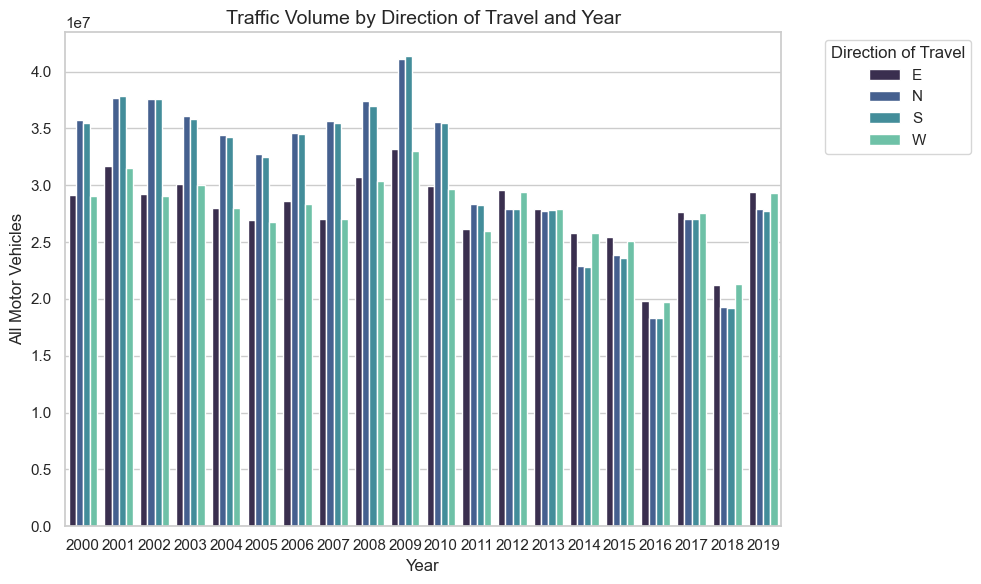

In [153]:
grouped_data = df.groupby(['direction_of_travel', 'year'])['all_motor_vehicles'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='all_motor_vehicles', hue='direction_of_travel', data=grouped_data, palette="mako"  )


plt.title('Traffic Volume by Direction of Travel and Year', fontsize=14)
plt.ylabel('All Motor Vehicles')
plt.xlabel('Year')

plt.legend(title='Direction of Travel', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  

plt.show()

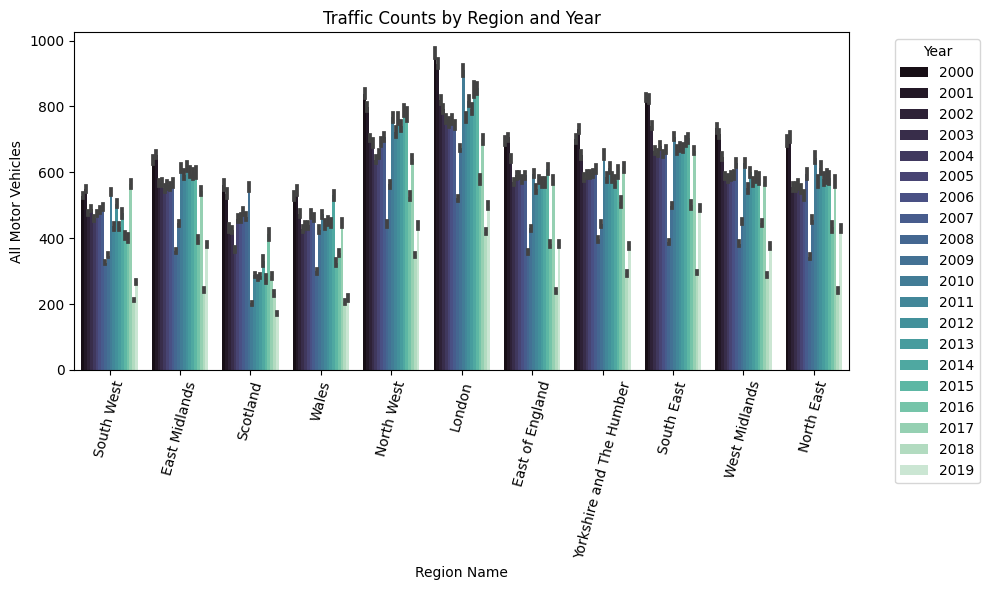

In [85]:

plt.figure(figsize=(10, 6))
sns.barplot(x='region_name', y='all_motor_vehicles', hue='year', data=df, palette='mako')
plt.title('Traffic Counts by Region and Year')
plt.xlabel('Region Name')
plt.xticks(rotation=75)
plt.ylabel('All Motor Vehicles')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

In [86]:
df['region_name'].unique()

array(['South West', 'East Midlands', 'Scotland', 'Wales', 'North West',
       'London', 'East of England', 'Yorkshire and The Humber',
       'South East', 'West Midlands', 'North East'], dtype=object)

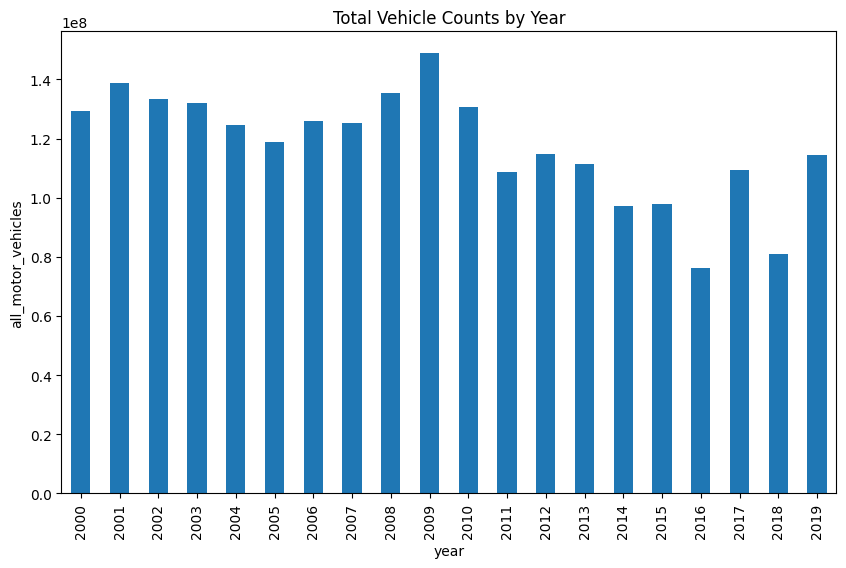

In [87]:
# the total vehicle counts for each year across all regions,

yearly_totals = df.groupby('year')['all_motor_vehicles'].sum()

# Plot bar chart
yearly_totals.plot(kind='bar', figsize=(10, 6))
plt.title('Total Vehicle Counts by Year')
plt.xlabel('year')
plt.ylabel('all_motor_vehicles')
plt.show()

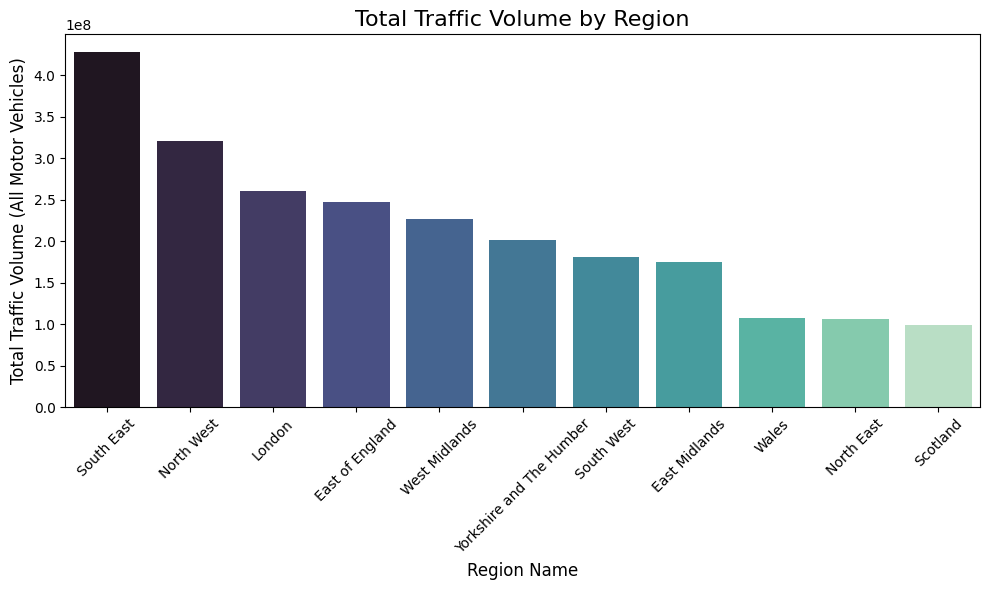

In [88]:
region_totals = df.groupby('region_name')['all_motor_vehicles'].sum().reset_index()

region_totals = region_totals.sort_values(by='all_motor_vehicles', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_totals, x='region_name', y='all_motor_vehicles', palette='mako')

plt.title("Total Traffic Volume by Region", fontsize=16)
plt.xlabel("Region Name", fontsize=12)
plt.ylabel("Total Traffic Volume (All Motor Vehicles)", fontsize=12)
plt.xticks(rotation=45) 

plt.tight_layout()
plt.show()

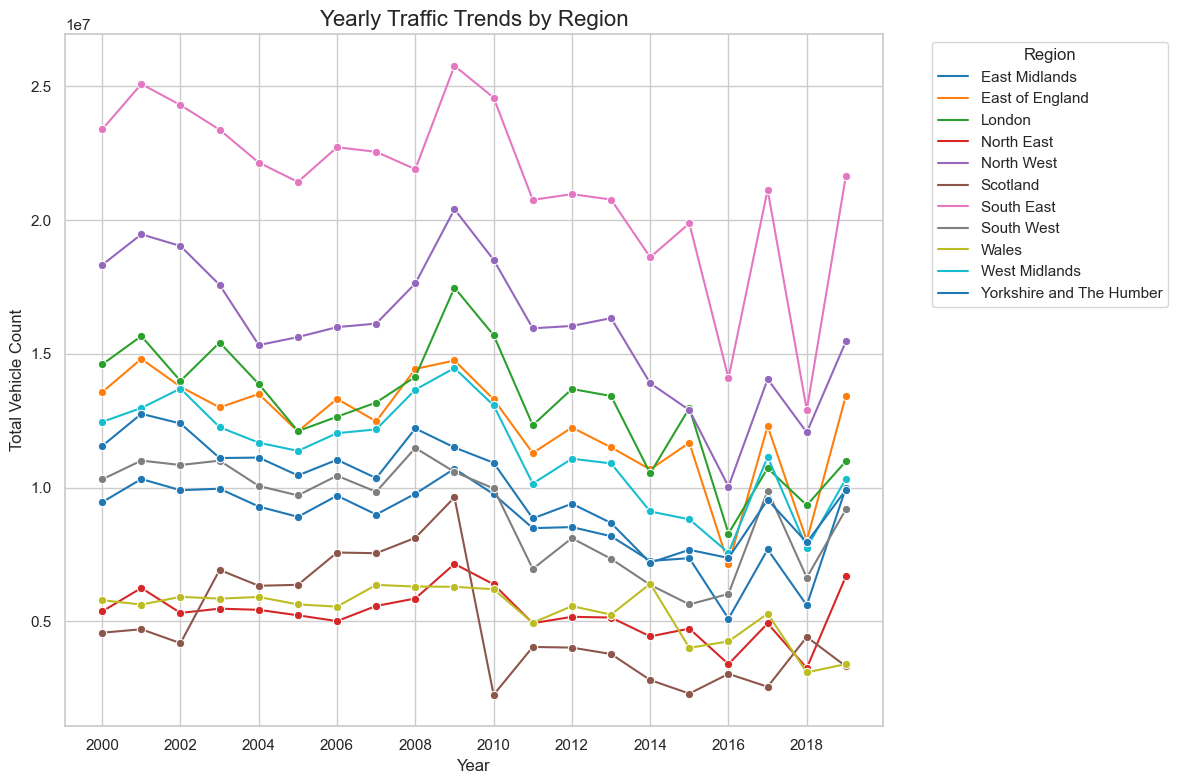

In [89]:
yearly_trends = df.groupby(['year', 'region_name'])['all_motor_vehicles'].sum().reset_index()

# Set the Seaborn style
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=yearly_trends, 
    x='year', 
    y='all_motor_vehicles', 
    hue='region_name', 
    marker='o',
    palette='tab10'
)

# Customize the x-axis ticks to show intervals of 2 years
min_year = yearly_trends['year'].min()
max_year = yearly_trends['year'].max()
plt.xticks(range(min_year, max_year + 1, 2))

# Customize the plot
plt.title("Yearly Traffic Trends by Region", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Vehicle Count", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure layout fits
plt.tight_layout()
plt.show()


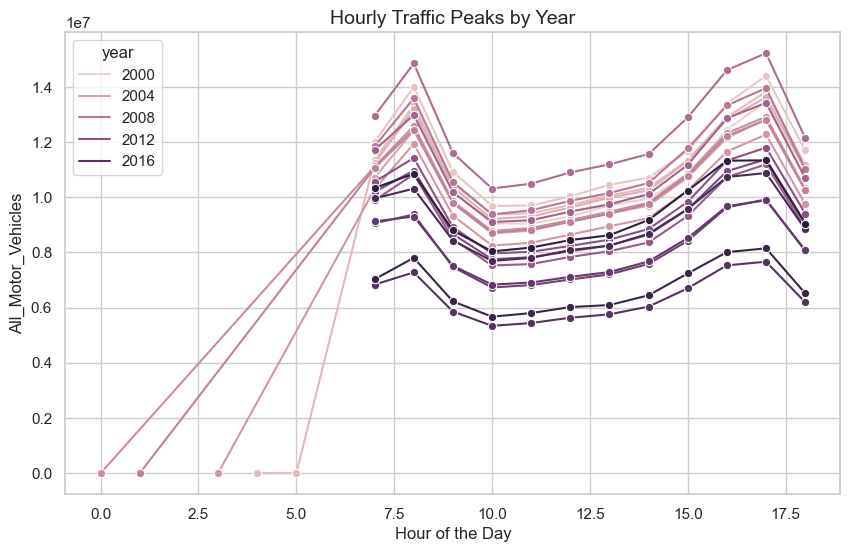

In [91]:



# Grouping data by hour and year, and calculating the total count of all motor vehicles per hour
grouped_data = df.groupby(['hour', 'year'])['all_motor_vehicles'].sum().reset_index()

# Create a line plot to visualize hourly traffic peaks by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='hour', y='all_motor_vehicles', hue='year', marker='o')

# Adding titles and labels
plt.title('Hourly Traffic Peaks by Year', fontsize=14)
plt.xlabel('Hour of the Day')
plt.ylabel('All_Motor_Vehicles')
plt.legend(title='year')

# Display the plot
plt.show()

In [17]:
df['road_type'].value_counts()


road_type
Minor    2364434
Major    1968379
Name: count, dtype: int64

In [18]:
road_type_impact = df.groupby('road_type')['all_motor_vehicles'].agg(['sum', 'mean']).reset_index()

road_type_impact.columns = ['road_type', 'total_count', 'average_count']


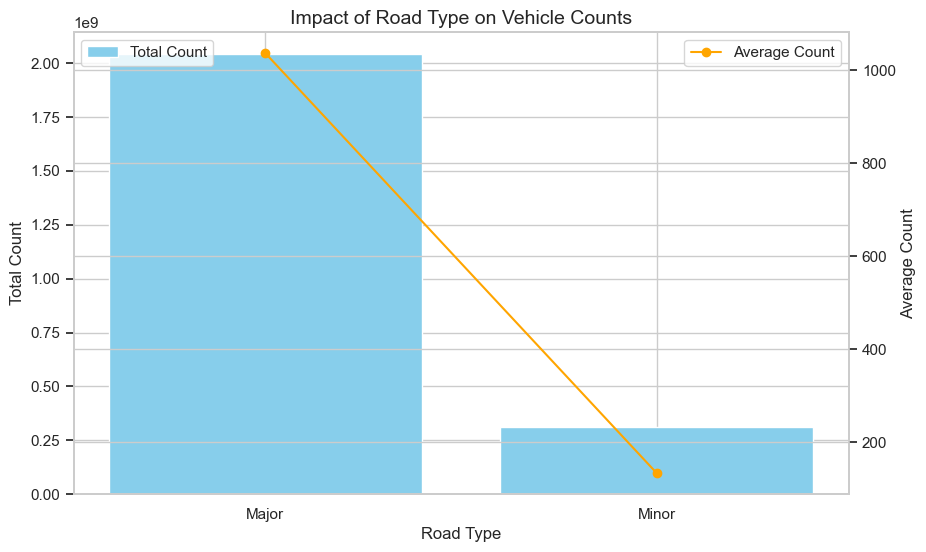

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(road_type_impact['road_type'], road_type_impact['total_count'], color='skyblue', label='Total Count')


ax2 = ax.twinx()
ax2.plot(road_type_impact['road_type'], road_type_impact['average_count'], color='orange', marker='o', label='Average Count')


ax.set_ylabel('Total Count', fontsize=12)
ax2.set_ylabel('Average Count', fontsize=12)
ax.set_xlabel('Road Type', fontsize=12)
plt.title('Impact of Road Type on Vehicle Counts', fontsize=14)


ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

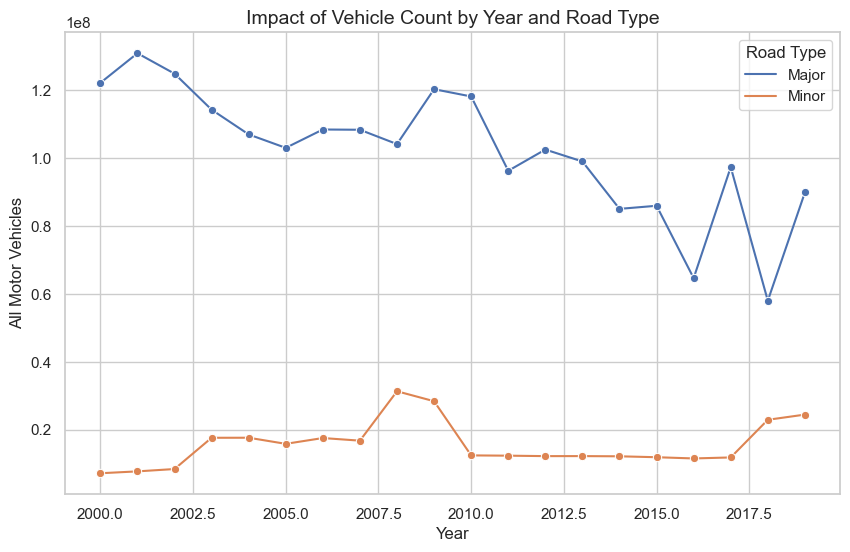

In [95]:


# Grouping data by 'year' and 'road_type' and calculating the sum of all motor vehicles for each combination
grouped_data = df.groupby(['year', 'road_type'])['all_motor_vehicles'].sum().reset_index()

# Create a line plot to show the impact of vehicle count with year and road type
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='all_motor_vehicles', hue='road_type', marker='o')

# Adding titles and labels
plt.title('Impact of Vehicle Count by Year and Road Type', fontsize=14)
plt.xlabel('Year')
plt.ylabel('All Motor Vehicles')
plt.legend(title='Road Type')

# Display the plot
plt.show()

In [56]:
road_type_impact = df.groupby('road_type').agg({
    'pedal_cycles': 'sum',
    'two_wheeled_motor_vehicles': 'sum',
    'cars_and_taxis': 'sum',
    'buses_and_coaches': 'sum',
    'lgvs': 'sum',
    'all_hgvs': 'sum',
    'all_motor_vehicles': 'sum'
}).reset_index()


road_type_impact.columns = [
    'road_type', 'total_pedal_cycles', 'total_two_wheeled_vehicles',
    'total_cars_and_taxis', 'total_buses_and_coaches', 'total_lgvs',
    'total_hgvs', 'total_motor_vehicles'
]

road_type_impact


,road_type,total_pedal_cycles,total_two_wheeled_vehicles,total_cars_and_taxis,total_buses_and_coaches,total_lgvs,total_hgvs,total_motor_vehicles
0,Major,7915773,18824786,1.571647e+09,19539322.0,276625879,154035684.0,2.040672e+09
1,Minor,4291101,2814272,2.601669e+08,4927006.0,38333246,7316730.0,3.135582e+08


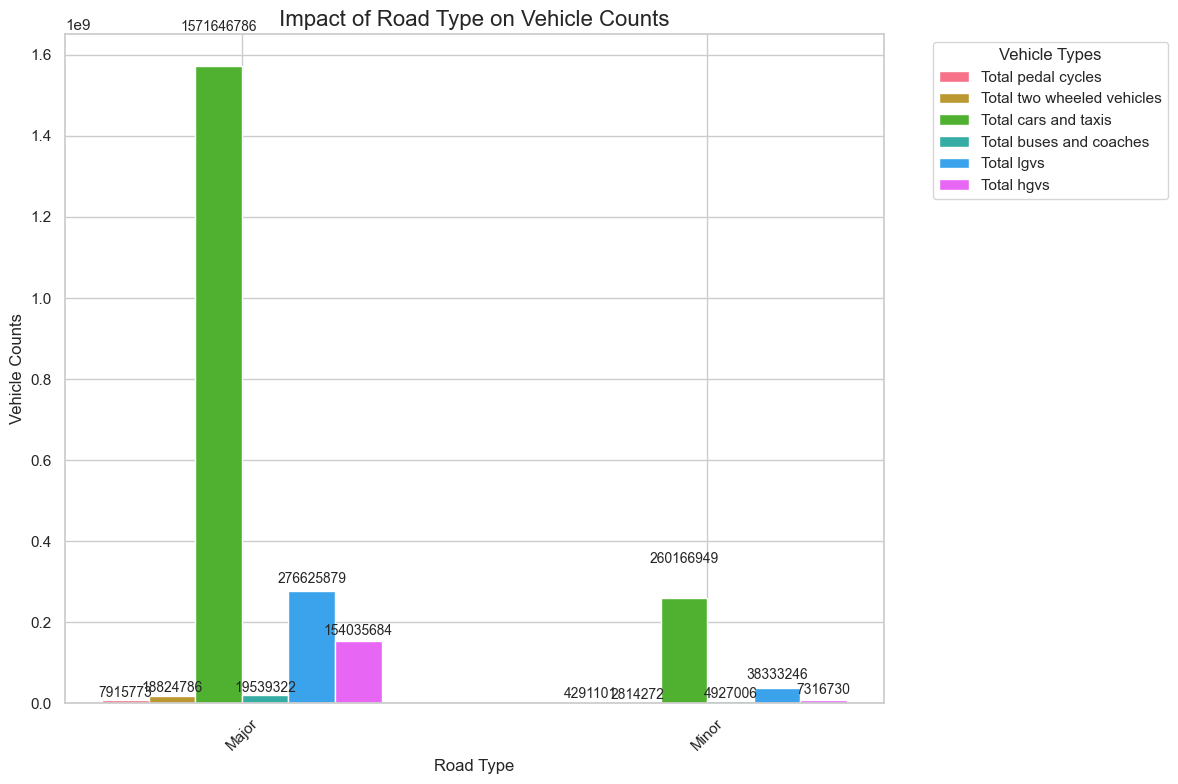

In [97]:
sns.set_theme(style="whitegrid")


vehicle_types = [
    'total_pedal_cycles', 'total_two_wheeled_vehicles',
    'total_cars_and_taxis', 'total_buses_and_coaches', 
    'total_lgvs', 'total_hgvs'
]
colors = sns.color_palette("husl", len(vehicle_types))

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.1 
x_positions = np.arange(len(road_type_impact['road_type']))


for idx, (vehicle_type, color) in enumerate(zip(vehicle_types, colors)):
    bars = ax.bar(
        x_positions + idx * bar_width, 
        road_type_impact[vehicle_type], 
        bar_width, 
        color=color, 
        label=vehicle_type.replace('_', ' ').capitalize()
    )
    

    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            yval + 0.05 * max(road_type_impact[vehicle_type]), 
            int(yval),  
            ha='center',
            va='bottom',  
            fontsize=10
        )


ax.legend(title='Vehicle Types', bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_title("Impact of Road Type on Vehicle Counts", fontsize=16)
ax.set_xlabel("Road Type", fontsize=12)
ax.set_ylabel("Vehicle Counts", fontsize=12)
ax.set_xticks(x_positions + (len(vehicle_types) - 1) * bar_width / 2)
ax.set_xticklabels(road_type_impact['road_type'], rotation=45)
plt.tight_layout()
plt.show()


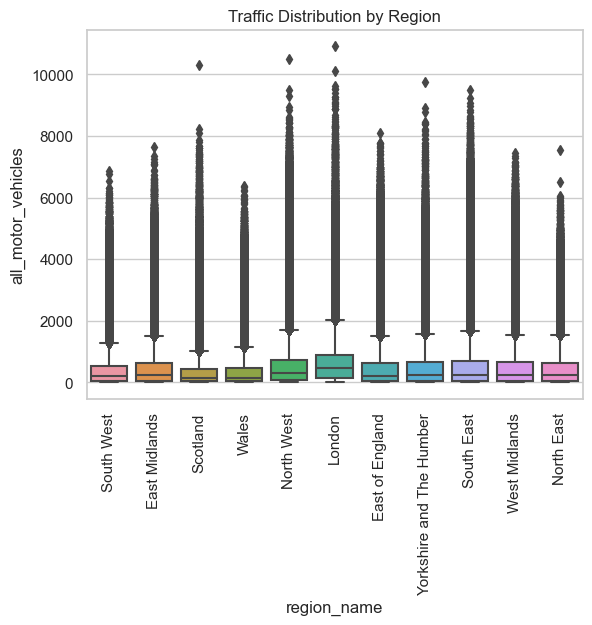

In [98]:
sns.boxplot(x='region_name', y='all_motor_vehicles', data=df)
plt.title('Traffic Distribution by Region')
plt.xticks(rotation=90)
plt.show()

In [19]:
df['local_authority_name'].unique()

array(['Isles of Scilly', 'Wiltshire', 'Gloucestershire', 'Somerset',
       'Devon', 'Dorset', 'North Somerset',
       'Cornwall excluding Isles of Scilly', 'Swindon',
       'Bristol, City of', 'Bournemouth, Christchurch and Poole',
       'South Gloucestershire', 'Bath and North East Somerset', 'Torbay',
       'Plymouth', 'Northamptonshire', 'Derbyshire', 'Rutland',
       'Leicestershire', 'Lincolnshire', 'Derby', 'Nottingham',
       'Nottinghamshire', 'Leicester', 'Stirling', 'Highland',
       'Glasgow City', 'Moray', 'South Lanarkshire',
       'West Dunbartonshire', 'Argyll & Bute', 'Perth & Kinross',
       'Falkirk', 'Orkney Islands', 'Shetland Islands',
       'Scottish Borders', 'Aberdeen City', 'Aberdeenshire',
       'Dundee City', 'Dumfries & Galloway', 'Comhairle nan Eilean Siar',
       'Fife', 'North Ayrshire', 'East Ayrshire', 'Clackmannanshire',
       'Renfrewshire', 'South Ayrshire', 'West Lothian',
       'City of Edinburgh', 'Angus', 'East Lothian', 'Midlothi

In [57]:
df['day_of_week'] = df['count_date'].dt.day_name()
df['month'] = df['count_date'].dt.month
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

In [58]:
df['day_of_week'].value_counts()

day_of_week
Friday       909466
Thursday     875839
Wednesday    868426
Tuesday      859304
Monday       819658
Sunday          120
Name: count, dtype: int64

In [59]:
min_traffic = df['all_motor_vehicles'].min()
max_traffic = df['all_motor_vehicles'].max()

print(f"Minimum traffic volume recorded: {min_traffic}")
print(f"Maximum traffic volume recorded: {max_traffic}")


Minimum traffic volume recorded: 0.0
Maximum traffic volume recorded: 10905.0


In [60]:
print("Details of maximum traffic volume:")
df[df['all_motor_vehicles'] == max_traffic]

Details of maximum traffic volume:


,direction_of_travel,year,count_date,hour,region_name,local_authority_name,road_name,road_type,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
1917061,E,2010,2010-06-09,8,London,Hillingdon,M25,Major,51.479307,-0.503345,0,45,8825.0,10.0,855,1170.0,10905.0,Wednesday,6,False


In [61]:
print("Details of minimum traffic volume:")
df[df['all_motor_vehicles'] == min_traffic]


Details of minimum traffic volume:


,direction_of_travel,year,count_date,hour,region_name,local_authority_name,road_name,road_type,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
361,E,2019,2019-06-05,7,South West,"Bristol, City of",A420,Major,51.457363,-2.577145,2,0,0.0,0.0,0,0.0,0.0,Wednesday,6,False
364,E,2019,2019-06-05,18,South West,"Bristol, City of",A420,Major,51.457363,-2.577145,24,0,0.0,0.0,0,0.0,0.0,Wednesday,6,False
365,E,2019,2019-06-05,13,South West,"Bristol, City of",A420,Major,51.457363,-2.577145,15,0,0.0,0.0,0,0.0,0.0,Wednesday,6,False
366,E,2019,2019-06-05,11,South West,"Bristol, City of",A420,Major,51.457363,-2.577145,3,0,0.0,0.0,0,0.0,0.0,Wednesday,6,False
368,E,2019,2019-06-05,8,South West,"Bristol, City of",A420,Major,51.457363,-2.577145,4,0,0.0,0.0,0,0.0,0.0,Wednesday,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279560,N,2000,2000-07-14,7,Yorkshire and The Humber,Leeds,U,Minor,53.892110,-1.714209,0,0,0.0,0.0,0,0.0,0.0,Friday,7,False
4279563,N,2000,2000-07-14,10,Yorkshire and The Humber,Leeds,U,Minor,53.892110,-1.714209,0,0,0.0,0.0,0,0.0,0.0,Friday,7,False
4281012,S,2000,2000-10-12,7,Yorkshire and The Humber,Leeds,U,Minor,53.801385,-1.530807,0,0,0.0,0.0,0,0.0,0.0,Thursday,10,False
4326520,S,2000,2000-05-23,11,West Midlands,Staffordshire,U,Minor,53.056470,-2.253493,0,0,0.0,0.0,0,0.0,0.0,Tuesday,5,False


In [62]:
print("Details of maximum traffic volume:")
df[df['all_motor_vehicles'] == max_traffic]

Details of maximum traffic volume:


,direction_of_travel,year,count_date,hour,region_name,local_authority_name,road_name,road_type,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
1917061,E,2010,2010-06-09,8,London,Hillingdon,M25,Major,51.479307,-0.503345,0,45,8825.0,10.0,855,1170.0,10905.0,Wednesday,6,False


In [63]:
df=df.drop(['latitude','longitude'],axis=1)


In [65]:
numericalColumns = df.select_dtypes(include=np.number).columns
numericalColumns

Index(['year', 'hour', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs',
       'all_motor_vehicles', 'month'],
      dtype='object')

In [66]:
numericalColumns.shape

(10,)

In [67]:
objectColumns = df.select_dtypes(include=object).columns
objectColumns

Index(['direction_of_travel', 'region_name', 'local_authority_name',
       'road_name', 'road_type', 'day_of_week'],
      dtype='object')

In [68]:
objectColumns.shape

(6,)

In [69]:
for i in objectColumns:
    print(df[i].value_counts())
    print('-'*50)

direction_of_travel
N    1161813
S    1159642
E    1006109
W    1005249
Name: count, dtype: int64
--------------------------------------------------
region_name
South East                  698863
North West                  503337
East of England             477742
South West                  427176
West Midlands               422472
Yorkshire and The Humber    371472
London                      358931
East Midlands               341411
Scotland                    265572
Wales                       262247
North East                  203590
Name: count, dtype: int64
--------------------------------------------------
local_authority_name
Hampshire                              120624
Essex                                  116375
Kent                                   111600
Surrey                                 103080
Lancashire                              91389
                                        ...  
Orkney Islands                           2844
Shetland Islands                  

In [70]:
label_encoders = {}

for col in objectColumns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  
    label_encoders[col] = le  

    joblib.dump(le, f'encoders/{col}_label_encoder.pkl')

print("Encoding complete and encoders saved.")

Encoding complete and encoders saved.


In [71]:
objectColumn = df.select_dtypes(include=object).columns
objectColumn 

Index([], dtype='object')

In [72]:
df.head()

,direction_of_travel,year,count_date,hour,region_name,local_authority_name,road_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
0,0,2019,2019-09-06,17,7,90,569,0,6,1,16.0,0.0,8,0.0,25.0,0,9,False
1,0,2019,2019-09-06,12,7,90,569,0,9,1,28.0,0.0,8,0.0,37.0,0,9,False
2,0,2019,2019-09-06,14,7,90,569,0,7,0,18.0,0.0,9,0.0,27.0,0,9,False
3,3,2019,2019-09-06,14,7,90,569,0,3,1,20.0,1.0,11,0.0,33.0,0,9,False
4,3,2019,2019-09-06,12,7,90,569,0,3,0,19.0,1.0,9,0.0,29.0,0,9,False


In [73]:
descreteCols=[]
continuesCols=[]

for column in numericalColumns:
    if df[column].nunique()>20:
        continuesCols.append(column)
    else:
        descreteCols.append(column)

In [74]:
continuesCols

['pedal_cycles',
 'two_wheeled_motor_vehicles',
 'cars_and_taxis',
 'buses_and_coaches',
 'lgvs',
 'all_hgvs',
 'all_motor_vehicles']

In [75]:
descreteCols

['year', 'hour', 'month']

In [76]:
df.corr()

,direction_of_travel,year,count_date,hour,region_name,local_authority_name,road_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
direction_of_travel,1.000000e+00,-0.000034,-0.000026,-6.333226e-07,0.000429,0.000144,1.165019e-04,1.977882e-05,-0.001167,-0.002851,-0.000158,-0.001029,-0.003164,-0.002527,-0.000937,0.000545,2.376970e-04,2.657938e-06
year,-3.422812e-05,1.000000,0.999486,3.035858e-06,-0.005377,0.008174,2.123070e-01,2.409492e-01,0.009372,-0.070232,-0.091686,-0.121947,-0.039772,-0.089672,-0.089012,0.002009,9.695934e-02,3.078552e-03
count_date,-2.627096e-05,0.999486,1.000000,3.009509e-06,-0.005203,0.008025,2.114694e-01,2.401713e-01,0.009648,-0.070233,-0.091868,-0.121765,-0.039947,-0.089969,-0.089208,0.002301,1.285776e-01,3.214687e-03
hour,-6.333226e-07,0.000003,0.000003,1.000000e+00,-0.000002,0.000003,3.405490e-07,-1.322494e-07,0.008306,0.035603,0.044377,-0.012549,-0.048386,-0.064303,0.019940,0.000002,-6.908182e-07,2.128712e-08
region_name,4.287603e-04,-0.005377,-0.005203,-2.301450e-06,1.000000,0.116014,6.387416e-02,1.612446e-02,-0.074066,-0.108103,-0.021645,-0.066936,-0.038281,-0.020861,-0.027333,-0.001654,4.914580e-03,8.389469e-03
local_authority_name,1.435606e-04,0.008174,0.008025,2.938320e-06,0.116014,1.000000,-2.057371e-02,-1.985125e-02,0.018561,0.017330,0.029938,-0.002687,0.020317,0.030009,0.029552,0.007002,-2.897238e-03,2.992178e-03
road_name,1.165019e-04,0.212307,0.211469,3.405490e-07,0.063874,-0.020574,1.000000e+00,8.575238e-01,-0.111949,-0.272123,-0.309632,-0.291292,-0.287588,-0.128817,-0.302404,-0.005095,-6.075824e-04,-1.969279e-03
road_type,1.977882e-05,0.240949,0.240171,-1.322494e-07,0.016124,-0.019851,8.575238e-01,1.000000e+00,-0.079783,-0.294071,-0.543919,-0.347125,-0.509460,-0.400052,-0.546161,-0.007171,4.557397e-03,-3.653997e-03
pedal_cycles,-1.166774e-03,0.009372,0.009648,8.305565e-03,-0.074066,0.018561,-1.119495e-01,-7.978259e-02,1.000000,0.457488,0.030114,0.297532,0.038190,-0.030065,0.037172,0.008280,9.430812e-03,-2.572289e-05
two_wheeled_motor_vehicles,-2.850539e-03,-0.070232,-0.070233,3.560296e-02,-0.108103,0.017330,-2.721229e-01,-2.940710e-01,0.457488,1.000000,0.432052,0.433873,0.443550,0.231513,0.445113,-0.002261,-7.732278e-03,-7.209908e-05


In [77]:
df.corr()['pedal_cycles']

direction_of_travel          -0.001167
year                          0.009372
count_date                    0.009648
hour                          0.008306
region_name                  -0.074066
local_authority_name          0.018561
road_name                    -0.111949
road_type                    -0.079783
pedal_cycles                  1.000000
two_wheeled_motor_vehicles    0.457488
cars_and_taxis                0.030114
buses_and_coaches             0.297532
lgvs                          0.038190
all_hgvs                     -0.030065
all_motor_vehicles            0.037172
day_of_week                   0.008280
month                         0.009431
is_weekend                   -0.000026
Name: pedal_cycles, dtype: float64

In [78]:
df=df.drop(['direction_of_travel','count_date','road_name',],axis=1)
df.head()

,year,hour,region_name,local_authority_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
0,2019,17,7,90,0,6,1,16.0,0.0,8,0.0,25.0,0,9,False
1,2019,12,7,90,0,9,1,28.0,0.0,8,0.0,37.0,0,9,False
2,2019,14,7,90,0,7,0,18.0,0.0,9,0.0,27.0,0,9,False
3,2019,14,7,90,0,3,1,20.0,1.0,11,0.0,33.0,0,9,False
4,2019,12,7,90,0,3,0,19.0,1.0,9,0.0,29.0,0,9,False


In [79]:
df.corr()['pedal_cycles']

year                          0.009372
hour                          0.008306
region_name                  -0.074066
local_authority_name          0.018561
road_type                    -0.079783
pedal_cycles                  1.000000
two_wheeled_motor_vehicles    0.457488
cars_and_taxis                0.030114
buses_and_coaches             0.297532
lgvs                          0.038190
all_hgvs                     -0.030065
all_motor_vehicles            0.037172
day_of_week                   0.008280
month                         0.009431
is_weekend                   -0.000026
Name: pedal_cycles, dtype: float64

In [80]:
df.to_csv('cleaned_data_set/cleaned.csv',index=False)

In [81]:
data=pd.read_csv('cleaned_data_set/cleaned.csv')
data.head()

,year,hour,region_name,local_authority_name,road_type,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,lgvs,all_hgvs,all_motor_vehicles,day_of_week,month,is_weekend
0,2019,17,7,90,0,6,1,16.0,0.0,8,0.0,25.0,0,9,False
1,2019,12,7,90,0,9,1,28.0,0.0,8,0.0,37.0,0,9,False
2,2019,14,7,90,0,7,0,18.0,0.0,9,0.0,27.0,0,9,False
3,2019,14,7,90,0,3,1,20.0,1.0,11,0.0,33.0,0,9,False
4,2019,12,7,90,0,3,0,19.0,1.0,9,0.0,29.0,0,9,False


In [82]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing sets to CSV files
train_data.to_csv('cleaned_data_set/cleaned.csv', index=False)
test_data.to_csv('cleaned_data_set/cleaned.csv', index=False)

print("Dataset split and saved successfully.")

Dataset split and saved successfully.


Pedal Cycles

In [83]:
X=train_data.drop(['pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs','all_motor_vehicles'],axis=1)
y=train_data['pedal_cycles']

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [88]:
y_train = np.array(y_train)
svr = LinearSVR(max_iter=5, random_state=42)
if y_train.ndim == 1:  # Check if it's 1D
    y_train = y_train.reshape(-1, 1)

svm_model = MultiOutputRegressor(svr, n_jobs=-1)
svm_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearSVR(max_iter=5, random_state=42),
                     n_jobs=-1)

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"SVR Performance for pedal cycle: MSE = {mse:.2f}, MAE Score = {mae:.2f}, RMSE= {rmse:.2f}")

SVR Performance for pedal cycle: MSE = 184.09, MAE Score = 3.15, RMSE= 13.57


LSTM

In [90]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

c:\Users\aryas\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
lstm_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32)


Epoch 1/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 89s 1ms/step - loss: 191.6827
Epoch 2/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - loss: 173.2468
Epoch 3/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 91s 1ms/step - loss: 176.4901
Epoch 4/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step - loss: 177.9132
Epoch 5/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 89s 1ms/step - loss: 171.7076
Epoch 6/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 90s 1ms/step - loss: 176.5337
Epoch 7/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - loss: 170.7784
Epoch 8/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 283s 3ms/step - loss: 178.8551
Epoch 9/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 83s 956us/step - loss: 165.8823
Epoch 10/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - loss: 172.5697
Epoch 11/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - loss: 162.4827
Epoch 12/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 88s 1ms/step - loss: 165.1276
Epoch 13/30
86657/86657 ━━━━━━━━━━━━━━━━━━━━ 87s 1ms/step - loss: 171.7162
Epoch 14/30
86657/86657 ━━━━━━━

In [135]:
y_pred_lstm = lstm_model.predict(X_test_reshaped)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm= np.sqrt(mse_lstm)
print(f"LSTM Performance: MSE = {mse_lstm:.2f}, MAE Score = {mae_lstm:.2f}, RMSE Score = {rmse_lstm:2f}")


21665/21665 [==============================] - 19s 870us/step
LSTM Performance: MSE = 171.61, MAE Score = 3.38, RMSE Score = 13.100044


In [136]:
lstm_model.save('models/pedal_cycle_lstm.keras')

GRU

In [137]:
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')

In [138]:
gru_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32)

Epoch 1/30
86657/86657 [==============================] - 3865s 45ms/step - loss: 187.5685
Epoch 2/30
86657/86657 [==============================] - 106s 1ms/step - loss: 184.3792
Epoch 3/30
86657/86657 [==============================] - 106s 1ms/step - loss: 184.1524
Epoch 4/30
86657/86657 [==============================] - 431s 5ms/step - loss: 184.0432
Epoch 5/30
86657/86657 [==============================] - 109s 1ms/step - loss: 184.0057
Epoch 6/30
86657/86657 [==============================] - 11273s 130ms/step - loss: 183.9403
Epoch 7/30
86657/86657 [==============================] - 111s 1ms/step - loss: 183.9411
Epoch 8/30
86657/86657 [==============================] - 107s 1ms/step - loss: 183.9046
Epoch 9/30
86657/86657 [==============================] - 108s 1ms/step - loss: 183.8897
Epoch 10/30
86657/86657 [==============================] - 105s 1ms/step - loss: 183.8736
Epoch 11/30
86657/86657 [==============================] - 108s 1ms/step - loss: 183.8530
Epoch 12/30
8

In [139]:
y_pred_gru = gru_model.predict(X_test_reshaped)
mse_gru = mean_squared_error(y_test, y_pred_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)

21665/21665 [==============================] - 19s 882us/step


In [140]:
print(f"GRU Performance for pedal cycles: MSE = {mse_gru:.2f}, MAE Score = {mae_gru:.2f}, RMSE Score = {rmse_gru:2f}")


GRU Performance for pedal cycles: MSE = 171.57, MAE Score = 3.57, RMSE Score = 13.098335


In [141]:
gru_model.save('models/pedal_cycles_gru.keras')